<a href="https://colab.research.google.com/github/yyahya-2000/Computer-vision/blob/main/Ex1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

You can download CIFAR10 dataset from official site:

https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [58]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [59]:
classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

In [60]:
# load the data
(X_tr, y_tr), (X_test, y_test) = cifar10.load_data()

## Split data into train and validation parts

Extract subset containing train and validation parts. 
Part must contain 5000 and 500 samples respectively.

In [61]:
# Put your code here


# Train data 5000 samples
X_train =  X_tr[:5000]
y_train =  y_tr[:5000]

# Validation data 500 samples
X_val = X_tr[5000:5500]
y_val = y_tr[5000:5500]

## Dispaly some images  along with it class names
  


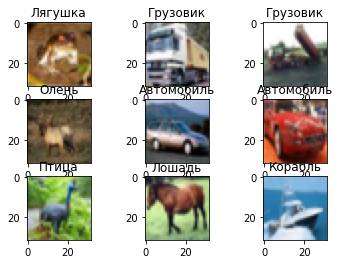

In [62]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.title(classes[y_train[i][0]])
    plt.imshow(img)
    
# show the plot
plt.show()

# Implement NearestNeighbor class

In [71]:
class NearestNeighbor:
  def __init__(self): # You can change the method signature
    pass

  def fit(self,x,y): # You can change the method signature
    """
      Arguments:
        x  (Tensor or numpy.array): collection of objects from testset (batch)
        y  (Tensor or numpy.array): collection of integer 
        representing a class number for objects from x
    
    """
    self.Xtr = x
    self.ytr = y
  
  def predict(self,x):
    """
      Arguments:
          x  (Tensor or numpy.array): collection of objects from testset (batch)
      
      Returns:
          class_num (Tensor or numpy.array) - collection of integer representing
          class numbers for objects from x             
    """
    
    num_test = x.shape[0]
    labels = np.zeros(num_test, dtype = self.ytr.dtype)
    for i in range(num_test):
      distances = np.sum(np.sum(np.sum(np.abs(self.Xtr - x[i,:]), axis = 1), axis = 1), axis = 1)
      min_index = np.argmin(distances)
      labels[i] = self.ytr[min_index]
    return labels

##Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [72]:
model_nn = NearestNeighbor()
# Put your code here if need 
model_nn.fit(X_train, y_train)
predicted_labels = model_nn.predict(X_test[0:9])
for i, label in enumerate(predicted_labels):
  print(classes[label],"vs",classes[y_test[i][0]])

Самолет vs Кошка
Грузовик vs Корабль
Корабль vs Корабль
Самолет vs Самолет
Лягушка vs Лягушка
Птица vs Лягушка
Птица vs Автомобиль
Олень vs Лягушка
Самолет vs Кошка


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [73]:
def validate(model,x, y):
  """
      Arguments:
          model (Object): instance of NearestNeighbor class
          x (Tensor or numpy.array): collection of objects 
          y (Tensor or numpy.array): collection of integer representing
          class numbers for objects from x   
      
      Returns:
          accuracy (float) : percentage of correctly classified objects 
    """
  predicted_labels = model.predict(x)
  count_mistakes = 0
  for i, label in enumerate(predicted_labels):
    if(label != y[i][0]):
      count_mistakes+=1
  accuracy = ((x.shape[0] - count_mistakes) / float(x.shape[0])) * 100
  print((x.shape[0] - count_mistakes), x.shape[0])
  return accuracy

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ## Calculate model accuracy on validation data

In [74]:
accuracy = validate(model_nn,X_val,y_val) 
print ("Accuracy {:.3f}".format(accuracy))

105 500
Accuracy 21.000


# Place for brief conclusion
Feel free to describe troubles here.


...



# Ideas for extra work

- Implenment K-NearestNeighbor
- Test different distance functions
- Find hyperparams using Cross-Validation
- Plot accuracy curve against K
- Evaluate time  